In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [48]:
# loading cleaned data
df = pd.read_csv('Data/23_24/cleaned_data.csv')

In [49]:
# consider players with more than 20% of the game
flit = (df['minutes']>df['minutes'].max()*0.4)
slim_df = df.loc[flit]
# slim_df.keys
# print(slim_df)
slim_df.columns

Index(['element_type', 'event_points', 'first_name', 'second_name', 'form',
       'points_per_game', 'selected_by_percent', 'status', 'team',
       'total_points', 'goals_scored', 'assists', 'yellow_cards', 'bps',
       'now_cost', 'minutes', 'clean_sheets', 'position', 'G+A', 'price',
       'price_range', 'ownership'],
      dtype='object')

In [50]:
slim_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
element_type,249.0,2.558233,0.806740,1.0,2.0,3.0,3.0,4.0
event_points,249.0,1.056225,2.178721,-2.0,0.0,0.0,1.0,14.0
form,249.0,2.277510,1.540599,-0.2,1.2,2.2,3.2,8.5
points_per_game,249.0,3.024498,1.141731,0.5,2.2,2.9,3.7,7.5
selected_by_percent,249.0,5.342570,9.580312,0.0,0.4,1.8,5.8,59.8
total_points,249.0,47.285141,21.049745,6.0,32.0,45.0,59.0,140.0
goals_scored,249.0,1.755020,2.381088,0.0,0.0,1.0,3.0,14.0
assists,249.0,1.586345,1.901181,0.0,0.0,1.0,2.0,9.0
yellow_cards,249.0,2.586345,1.776179,0.0,1.0,2.0,4.0,8.0
bps,249.0,213.706827,79.665166,63.0,154.0,202.0,261.0,442.0


In [51]:
# Plotting
plt.style.use('ggplot')


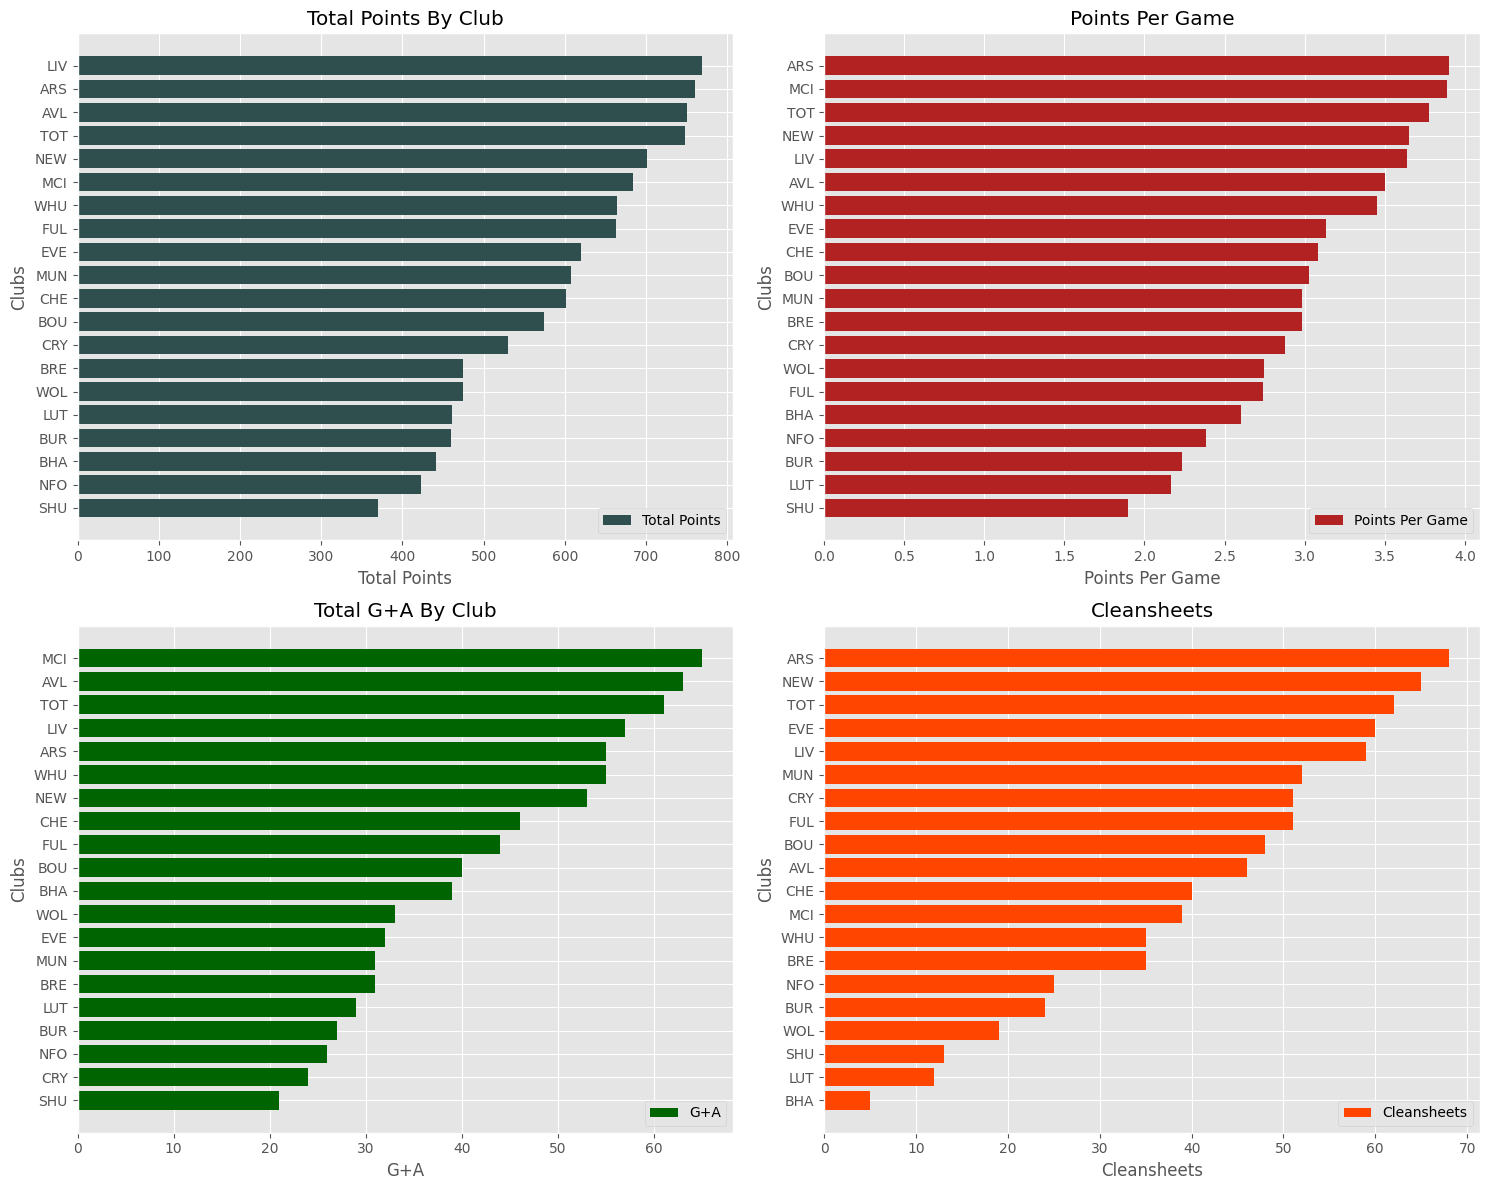

In [55]:
tp_df = slim_df.pivot_table('total_points', index='team', aggfunc='sum').sort_values(by='total_points', ascending=True)
ppg_df = slim_df.pivot_table('points_per_game', index='team', aggfunc='mean').sort_values(by='points_per_game', ascending=True)
att_df = slim_df.pivot_table('G+A', index='team', aggfunc='sum').sort_values(by='G+A', ascending=True)
def_df = slim_df.pivot_table('clean_sheets', index='team', aggfunc='sum').sort_values(by='clean_sheets', ascending=True)
# slim_df.pivot_table

fg, ax = plt.subplots(2, 2, figsize=(15,12))

(ax1, ax2), (ax3, ax4) = ax

#Plot 1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.barh(x1, y1, label='Total Points', color='#2F4F4F')
ax1.set(title='Total Points By Club', ylabel='Clubs', xlabel='Total Points')
ax1.legend()

#Plot 2
x2 = ppg_df.index
y2 = ppg_df['points_per_game']
ax2.barh(x2, y2, label='Points Per Game', color='#B22222')
ax2.set(title='Points Per Game', ylabel='Clubs', xlabel='Points Per Game')
ax2.legend()

#Plot 3
x3 = att_df.index
y3 = att_df['G+A']
ax3.barh(x3, y3, label='G+A', color='#006400')
ax3.set(title='Total G+A By Club', ylabel='Clubs', xlabel='G+A')
ax3.legend()

#Plot 4
x4 = def_df.index
y4 = def_df['clean_sheets']
ax4.barh(x4, y4, label='Cleansheets', color='#FF4500')
ax4.set(title='Cleansheets', ylabel='Clubs', xlabel='Cleansheets')
ax4.legend()

plt.tight_layout()

In [53]:
# slim_df.loc[:, 'ownership']\
ownership_df = slim_df.pivot_table('selected_by_percent', index='team', aggfunc='sum').sort_values(by='selected_by_percent', ascending=True)
ownership_df

,selected_by_percent
team,
BUR,11.0
LUT,16.0
NFO,17.5
SHU,20.3
WOL,22.1
BRE,23.3
EVE,26.9
FUL,26.9
CRY,34.8


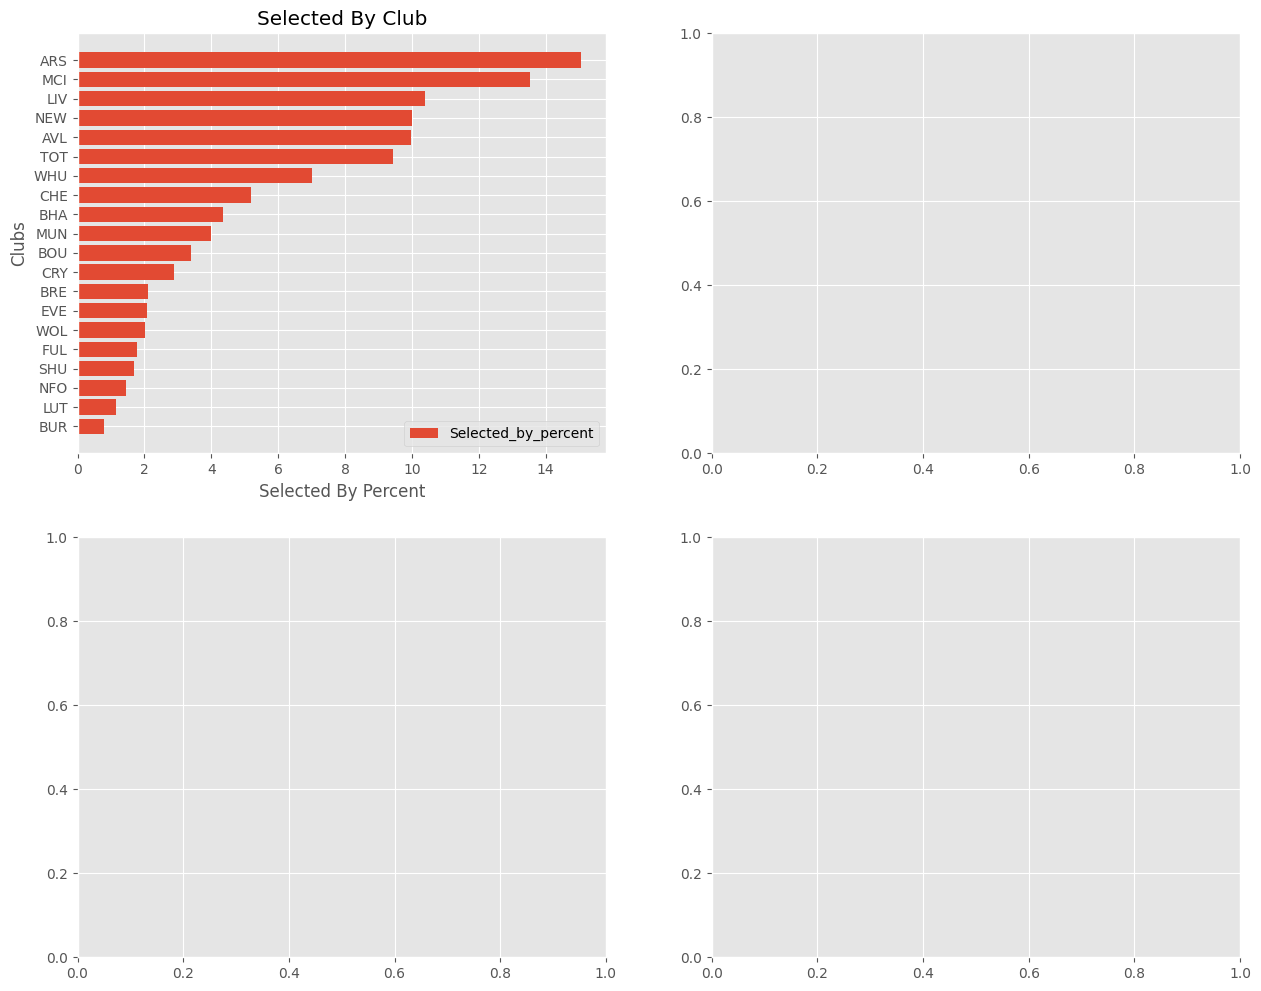

In [77]:
ownership_df = slim_df.pivot_table('selected_by_percent', index='team', aggfunc='mean').sort_values(by='selected_by_percent', ascending=True)

# create plot space
fg, ax = plt.subplots(2, 2, figsize=(15,12))
(ax5, ax6), (ax7, ax8) = ax
# plot for ownership by team
x5=ownership_df.index
y5=ownership_df['selected_by_percent']
ax5.set(title='Selected By Club', ylabel='Clubs', xlabel='Selected By Percent')
ax5.barh(x5, y5, label='Selected_by_percent')
ax5.legend()
